<a href="https://colab.research.google.com/github/bonyuta0204/gis-exploration/blob/main/station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib
import japanize_matplotlib

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

japanize_matplotlib.japanize()


## データ
利用するGISデータは国土数値情報からダウンロードした。

[鉄道駅](https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N02-v2_3.html)

[都道府県県境](https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-2024.html)

In [3]:
# 令和二年の駅情報
stations = gpd.read_file('/content/drive/MyDrive/GIS/N02-20_GML/N02-20_Station.shp')
stations.to_crs(epsg=4326,inplace=True)
stations.rename(columns={'N02_003': 'company',"N02_004": "line", "N02_005": "station_name" }, inplace=True)

# 作成済みの都道府県県境を読み込み
prefectures =  gpd.read_file("/content/drive/MyDrive/GIS/prefectures/simple_polygon.shp")
prefectures = prefectures[["N03_001","geometry"]].rename(columns={'N03_001': 'prefecture_name' })

In [4]:
stations.head()

,N02_001,N02_002,company,line,station_name,geometry
0,11,2,指宿枕崎線,九州旅客鉄道,二月田,"LINESTRING (130.63035 31.25405, 130.62985 31.2..."
1,23,5,沖縄都市モノレール線,沖縄都市モノレール,古島,"LINESTRING (127.70279 26.23035, 127.70309 26.2..."
2,24,5,東京臨海新交通臨海線,ゆりかもめ,お台場海浜公園,"LINESTRING (139.77818 35.62961, 139.77888 35.6..."
3,24,5,東京臨海新交通臨海線,ゆりかもめ,東京国際クルーズターミナル,"LINESTRING (139.77333 35.62109, 139.77288 35.6..."
4,24,5,東京臨海新交通臨海線,ゆりかもめ,テレコムセンター,"LINESTRING (139.78001 35.61791, 139.77932 35.6..."


In [5]:
prefectures.head()

,prefecture_name,geometry
0,北海道,"MULTIPOLYGON (((139.34070 41.49478, 139.34074 ..."
1,青森県,"MULTIPOLYGON (((139.50044 40.53221, 139.50038 ..."
2,岩手県,"MULTIPOLYGON (((141.71204 38.93624, 141.71208 ..."
3,宮城県,"MULTIPOLYGON (((141.06187 38.26034, 141.05506 ..."
4,秋田県,"MULTIPOLYGON (((139.69204 39.93456, 139.69212 ..."


In [6]:
shiga = prefectures[prefectures["prefecture_name"]=="滋賀県"]
shiga_stations = gpd.sjoin(stations, shiga, op='within')


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
shiga_stations.head()

,N02_001,N02_002,company,line,station_name,geometry,index_right,prefecture_name
730,21,4,京津線,京阪電気鉄道,上栄町,"LINESTRING (135.86004 35.00486, 135.86034 35.0...",24,滋賀県
732,21,4,京津線,京阪電気鉄道,大谷,"LINESTRING (135.85360 34.99424, 135.85273 34.9...",24,滋賀県
735,21,4,京津線,京阪電気鉄道,びわ湖浜大津,"LINESTRING (135.86366 35.01145, 135.86436 35.0...",24,滋賀県
747,21,4,石山坂本線,京阪電気鉄道,南滋賀,"LINESTRING (135.85760 35.03615, 135.85777 35.0...",24,滋賀県
748,21,4,石山坂本線,京阪電気鉄道,石場,"LINESTRING (135.87582 35.00445, 135.87526 35.0...",24,滋賀県


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-8-21a8a51cd9b9>:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


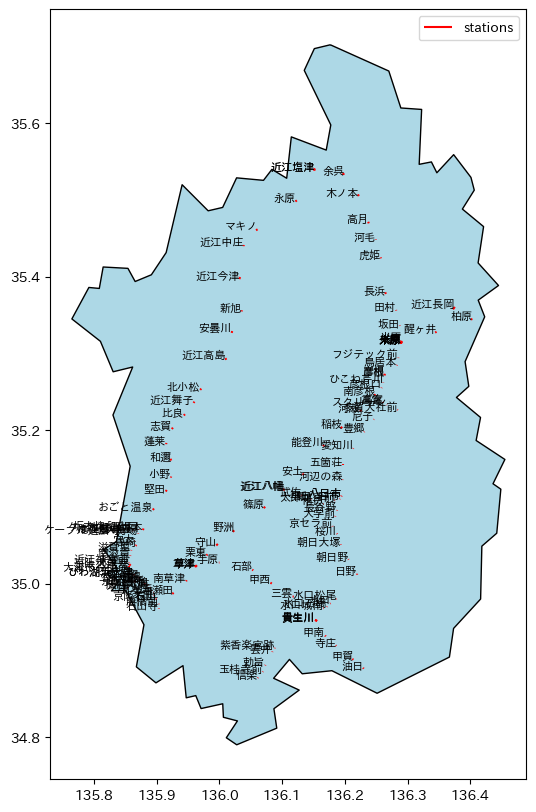

In [8]:
shiga_stations = gpd.sjoin(stations, shiga, op='within')


# Create a plot for the first object (滋賀県)
fig, ax = plt.subplots(figsize=(10, 10))
shiga.plot(ax=ax, color="lightblue", edgecolor="black", label="Shiga")

# Plot the second object (草津線) on the same axes
shiga_stations.plot(ax=ax, color="red", label="stations")


# 3. Add station names to the plot
for idx, row in shiga_stations.iterrows():
    ax.text(row.geometry.xy[0][0], row.geometry.xy[1][0], row["station_name"], fontsize=8, ha='right', color='black')

# Add a legend and display the plot
plt.legend()
plt.show()

## 練習 - sjoin
都道府県ごとの駅の数を求める

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


<Axes: xlabel='prefecture_name'>

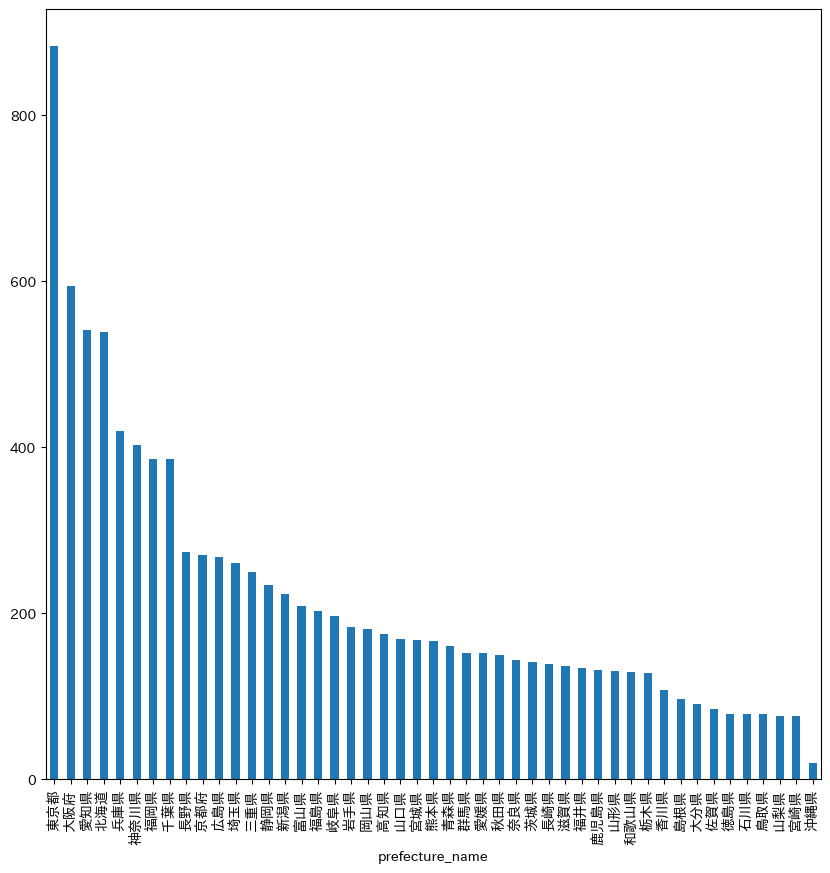

In [9]:
stations.sjoin(prefectures,op="within").groupby("prefecture_name")["station_name"].count().sort_values(ascending=False).plot(kind="bar",figsize=(10,10))